In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

__Dataset__

In [ ]:
df = pd.read_csv('clothing_reviews.csv')

In [ ]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


- Title: Title of the review
- Review Text: Review
- Rating: Product rating by reviewer
- Recommended IND: Whether the product is recommended or not by the reviewer

In [ ]:
df = df[['Title', 'Review Text', 'Rating', 'Recommended IND']]
df

,Title,Review Text,Rating,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [ ]:
df.isnull().sum()

Title              3810
Review Text         845
Rating                0
Recommended IND       0
dtype: int64

In [ ]:
df[df['Title'].isnull() & df['Review Text'].isnull()]

,Title,Review Text,Rating,Recommended IND
92,NaN,NaN,5,1
93,NaN,NaN,5,1
98,NaN,NaN,5,1
135,NaN,NaN,4,1
142,NaN,NaN,5,1
...,...,...,...,...
23258,NaN,NaN,4,1
23301,NaN,NaN,5,1
23303,NaN,NaN,5,1
23470,NaN,NaN,5,1


In [ ]:
# remove data where both Title and Review Text are missing
df.dropna(subset = ['Review Text'], inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,Title,Review Text,Rating,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...
22636,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
22637,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
22638,"Cute, but see through","This fit well, but the top was very see throug...",3,0
22639,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [ ]:
# combine two columns, Title and Review Data
df['Title'] = df['Title'].astype('str')
df['Review Text'] = df['Review Text'].astype('str')

In [ ]:
df['Combined'] = df[['Title', 'Review Text']].agg(' '.join, axis=1)

In [ ]:
df

,Title,Review Text,Rating,Recommended IND,Combined
0,nan,Absolutely wonderful - silky and sexy and comf...,4,1,nan Absolutely wonderful - silky and sexy and ...
1,nan,Love this dress! it's sooo pretty. i happene...,5,1,nan Love this dress! it's sooo pretty. i hap...
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...
22636,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,Great dress for many occasions I was very happ...
22637,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,Wish it was made of cotton It reminds me of ma...
22638,"Cute, but see through","This fit well, but the top was very see throug...",3,0,"Cute, but see through This fit well, but the t..."
22639,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,"Very cute dress, perfect for summer parties an..."


In [ ]:
for i in range(len(df)):
    if df['Combined'][i].startswith('nan '):
        df['Combined'][i] = df['Combined'][i][4:]

In [ ]:
df

,Title,Review Text,Rating,Recommended IND,Combined
0,nan,Absolutely wonderful - silky and sexy and comf...,4,1,Absolutely wonderful - silky and sexy and comf...
1,nan,Love this dress! it's sooo pretty. i happene...,5,1,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...
22636,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,Great dress for many occasions I was very happ...
22637,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,Wish it was made of cotton It reminds me of ma...
22638,"Cute, but see through","This fit well, but the top was very see throug...",3,0,"Cute, but see through This fit well, but the t..."
22639,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,"Very cute dress, perfect for summer parties an..."


In [ ]:
df_text = df.copy()
df_text = df_text[['Combined', 'Rating', 'Recommended IND']]
df_text

,Combined,Rating,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws I had such high hopes ...,3,0
3,"My favorite buy! I love, love, love this jumps...",5,1
4,Flattering shirt This shirt is very flattering...,5,1
...,...,...,...
22636,Great dress for many occasions I was very happ...,5,1
22637,Wish it was made of cotton It reminds me of ma...,3,1
22638,"Cute, but see through This fit well, but the t...",3,0
22639,"Very cute dress, perfect for summer parties an...",3,1


In [ ]:
# remove duplicates
df_text[df_text.duplicated(subset='Combined')]

,Combined,Rating,Recommended IND
9711,Love retailer bathing suits! Perfect fit and i...,5,1
10686,Cute cover-up or summer top & shorts! Lightwei...,5,1
12877,Love retailer bathing suits! Perfect fit and i...,5,1
20698,Soft & beautiful! The sweater and skirt are so...,5,1
21096,"Love, love these jeans. being short they come ...",5,1


In [ ]:
df_text = df_text.drop_duplicates(keep='first')

In [ ]:
df_text = df_text.reset_index(drop=True)

In [ ]:
df_text

,Combined,Rating,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,Some major design flaws I had such high hopes ...,3,0
3,"My favorite buy! I love, love, love this jumps...",5,1
4,Flattering shirt This shirt is very flattering...,5,1
...,...,...,...
22631,Great dress for many occasions I was very happ...,5,1
22632,Wish it was made of cotton It reminds me of ma...,3,1
22633,"Cute, but see through This fit well, but the t...",3,0
22634,"Very cute dress, perfect for summer parties an...",3,1


In [ ]:
# polarity
df_text['Polarity'] = df_text['Combined'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_text

,Combined,Rating,Recommended IND,Polarity
0,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333
1,Love this dress! it's sooo pretty. i happene...,5,1,0.339583
2,Some major design flaws I had such high hopes ...,3,0,0.073209
3,"My favorite buy! I love, love, love this jumps...",5,1,0.560714
4,Flattering shirt This shirt is very flattering...,5,1,0.512891
...,...,...,...,...
22631,Great dress for many occasions I was very happ...,5,1,0.580476
22632,Wish it was made of cotton It reminds me of ma...,3,1,0.091667
22633,"Cute, but see through This fit well, but the t...",3,0,0.425000
22634,"Very cute dress, perfect for summer parties an...",3,1,0.413636


In [ ]:
df_text['Polarity'].describe()

count    22636.000000
mean         0.266732
std          0.176328
min         -0.987500
25%          0.157083
50%          0.260000
75%          0.372222
max          1.000000
Name: Polarity, dtype: float64

- 1: Positive
- 0: Netural
- -1: Negative

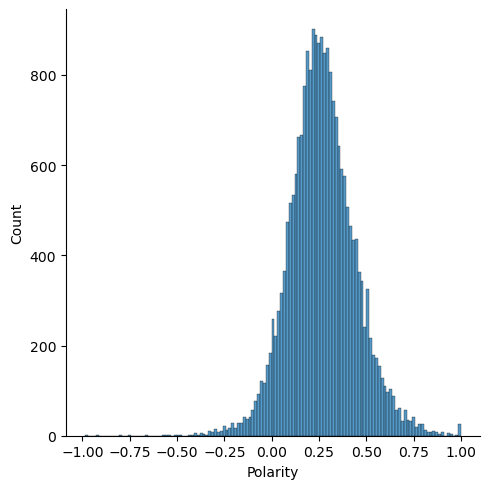

In [ ]:
import seaborn as sns
sns.displot(df_text, x="Polarity")

__Data Preprocessing__

In [ ]:
df_text

,Combined,Rating,Recommended IND,Polarity
0,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333
1,Love this dress! it's sooo pretty. i happene...,5,1,0.339583
2,Some major design flaws I had such high hopes ...,3,0,0.073209
3,"My favorite buy! I love, love, love this jumps...",5,1,0.560714
4,Flattering shirt This shirt is very flattering...,5,1,0.512891
...,...,...,...,...
22631,Great dress for many occasions I was very happ...,5,1,0.580476
22632,Wish it was made of cotton It reminds me of ma...,3,1,0.091667
22633,"Cute, but see through This fit well, but the t...",3,0,0.425000
22634,"Very cute dress, perfect for summer parties an...",3,1,0.413636


In [ ]:
# convert into lower cases
df_text['Combined'] = df_text['Combined'].str.lower()

In [ ]:
# remove punctuations
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
df_text['Combined'] = df_text['Combined'].apply(lambda text: remove_punctuation(text))

In [ ]:
# remove stop words
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
df_text['Combined'] = df_text['Combined'].apply(lambda text: remove_stopwords(text))

In [ ]:
# remove numbers
def remove_numbers(text):
    return " ".join([word for word in str(text).split() if word.isalpha()])

In [ ]:
df_text['Combined'] = df_text['Combined'].apply(lambda text: remove_numbers(text))

In [ ]:
# lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
df_text['Combined'] = df_text['Combined'].apply(lambda text: lemmatize_words(text))

In [ ]:
# rare words
" ".join(df_text['Combined']).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happen',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'order',
 'online',
 'bc',
 'petite',
 'buy',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'major',
 'design',
 'flaws',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'order',
 'petite',
 'small',
 'usual',
 'size',
 'find',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reorder',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'favorite',
 'buy',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 

In [ ]:
word_counts = pd.Series(" ".join(df_text['Combined']).split()).value_counts()
word_counts

dress           13641
love            12094
fit             11686
size            10674
look             9429
                ...  
hippyi              1
okaycouldnt         1
lbsaverage          1
birkinstocks        1
platinum            1
Length: 16723, dtype: int64

In [ ]:
# remove rare words where they appear less than three times
rare_words = word_counts[word_counts <= 2]
rare_words

wobbly              2
nondenim            2
elder               2
peter               2
bluepurplesilver    2
                   ..
hippyi              1
okaycouldnt         1
lbsaverage          1
birkinstocks        1
platinum            1
Length: 11191, dtype: int64

In [ ]:
rare_words.value_counts()

1    9280
2    1911
dtype: int64

In [ ]:
len(rare_words)

11191

In [ ]:
df_text['Combined'] = df_text['Combined'].apply(lambda text: " ".join([word for word in str(text).split() if word not in rare_words.index]))

In [ ]:
df_text

,Combined,Rating,Recommended IND,Polarity
0,absolutely wonderful silky sexy comfortable,4,1,0.633333
1,love dress sooo pretty happen find store im gl...,5,1,0.339583
2,major design flaws high hope dress really want...,3,0,0.073209
3,favorite buy love love love jumpsuit fun flirt...,5,1,0.560714
4,flatter shirt shirt flatter due adjustable fro...,5,1,0.512891
...,...,...,...,...
22631,great dress many occasion happy snag dress gre...,5,1,0.580476
22632,wish make cotton remind maternity clothes soft...,3,1,0.091667
22633,cute see fit well top see never would work im ...,3,0,0.425000
22634,cute dress perfect summer party buy dress wed ...,3,1,0.413636


__Positive and Negative Datasets__
- Two datasets created for SketchEngine, based on Recommended IND

In [ ]:
pre = df_text[['Combined','Recommended IND']]
pre

,Combined,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happen find store im gl...,1
2,major design flaws high hope dress really want...,0
3,favorite buy love love love jumpsuit fun flirt...,1
4,flatter shirt shirt flatter due adjustable fro...,1
...,...,...
22631,great dress many occasion happy snag dress gre...,1
22632,wish make cotton remind maternity clothes soft...,1
22633,cute see fit well top see never would work im ...,0
22634,cute dress perfect summer party buy dress wed ...,1


In [ ]:
pre.to_csv('preprocessed.csv')

In [ ]:
pos = pre.copy()
pos = pos[pos['Recommended IND']==1]
pos = pos[['Combined']]
pos = pos.reset_index(drop=True)
pos

,Combined
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happen find store im gl...
2,favorite buy love love love jumpsuit fun flirt...
3,flatter shirt shirt flatter due adjustable fro...
4,shimmer fun basket hte last see would look lik...
...,...
18530,fun piece wasnt sure order skirt couldnt see p...
18531,great dress many occasion happy snag dress gre...
18532,wish make cotton remind maternity clothes soft...
18533,cute dress perfect summer party buy dress wed ...


In [ ]:
pos.to_csv('positive.csv')

In [ ]:
neg = pre.copy()
neg = neg[neg['Recommended IND']==0]
neg = neg[['Combined']]
neg = neg.reset_index(drop=True)
neg

,Combined
0,major design flaws high hope dress really want...
1,petite love tracy reese dress one petite foot ...
2,dress look like make cheap material dress run ...
3,look like first pullover style side zipper wou...
4,fall flat love material didnt really look long...
...,...
4096,try color really pretty fun want pair pant loo...
4097,want love jacket soft great color unfortunatel...
4098,high hope purchase good price typically love m...
4099,unflattering surprise positive review product ...


In [ ]:
neg.to_csv('negative.csv')

__Selecting classes__

In [ ]:
df_text['Rating'].value_counts()

5    12535
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

- Positive: 15,443
- Neutral: 2,823
- Negative: 2,370

In [ ]:
df_text['Recommended IND'].value_counts()

1    18535
0     4101
Name: Recommended IND, dtype: int64

- Recommended: 18,535
- Not recommended: 4,101

In [ ]:
df_text.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    806
        1                     15
2       0                   1455
        1                     94
3       0                   1653
        1                   1170
4       0                    164
        1                   4744
5       0                     23
        1                  12512
Name: Recommended IND, dtype: int64

- Positive: 18,613
- Negative: 4,023

__Classification based on Recommended IND__

In [ ]:
df_text['Recommended IND'].value_counts()

1    18535
0     4101
Name: Recommended IND, dtype: int64

In [ ]:
pos_df = df_text[df_text['Recommended IND']==1]
neg_df = df_text[df_text['Recommended IND']==0]

In [ ]:
pos_words =[]
neg_words = []

for review in pos_df['Combined']:
    pos_words.append(review)
pos_words = ' '.join(pos_words)

for review in neg_df['Combined']:
    neg_words.append(review)
neg_words = ' '.join(neg_words)

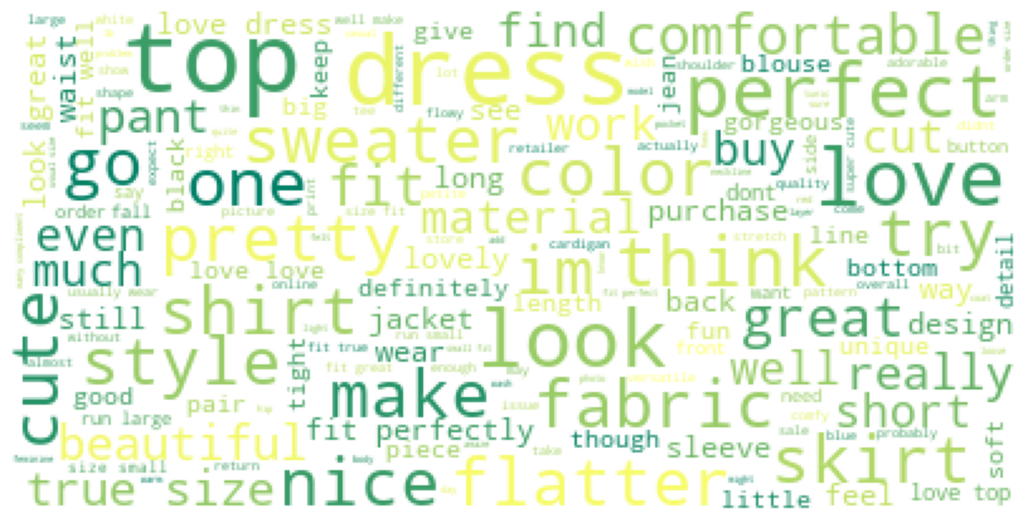

In [ ]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

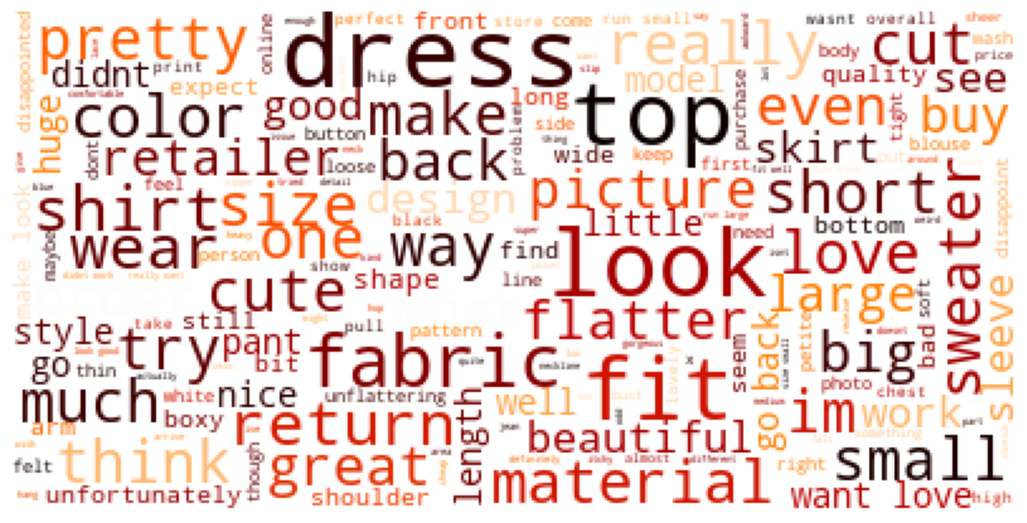

In [ ]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# 'stratify' for the imbalanced dataset
X = df_text['Combined']
y = df_text['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
# count vectorisation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
# tf-idf vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_estimator(model ,X_test, y_test)

__Logistic Regression using count vectorisation__

In [ ]:
# Logistic Regression with count vectorizer
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count, y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       820
           1       0.96      0.89      0.93      3708

    accuracy                           0.88      4528
   macro avg       0.80      0.87      0.82      4528
weighted avg       0.90      0.88      0.89      4528

Train_Set
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      3281
           1       0.99      0.93      0.96     14827

    accuracy                           0.93     18108
   macro avg       0.87      0.94      0.90     18108
weighted avg       0.95      0.93      0.94     18108



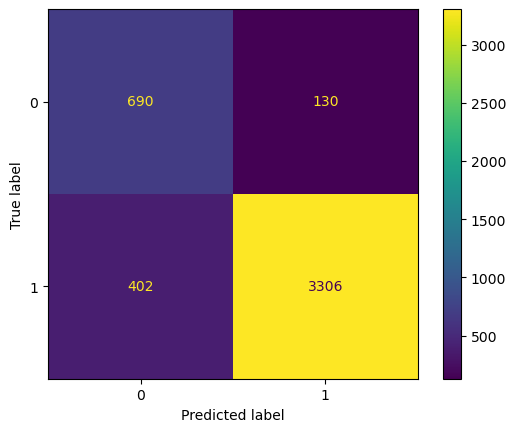

In [ ]:
print("LOG MODEL")

eval(log, X_train_count, X_test_count)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
                log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8820413312140968

 precision-0          score for count : 0.6368092096104764

 recall-0             score for count : 0.8122562828971753

 f1-0                 score for count : 0.7138283413881348

 precision-1          score for count : 0.9557816405929824

 recall-1             score for count : 0.8974842183523023

 f1-1                 score for count : 0.9257059744715521



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(y_test, y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.9287897624121872


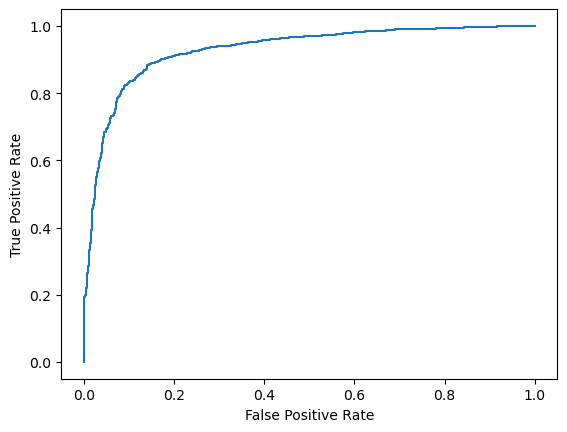

In [ ]:
log_prob = log.predict_proba(X_test_count)
log_prob = log_prob[:, 1]
plot_roc_curve(y_test, log_prob)
print(f'model 1 AUC score: {roc_auc_score(y_test, log_prob)}')

__Logistic Regression using tf_idf vectorisation__

In [ ]:
# Logistic Regression with tf-idf vectorizer
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       820
           1       0.97      0.85      0.91      3708

    accuracy                           0.86      4528
   macro avg       0.77      0.87      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.90      0.71      3281
           1       0.97      0.86      0.91     14827

    accuracy                           0.87     18108
   macro avg       0.78      0.88      0.81     18108
weighted avg       0.90      0.87      0.88     18108



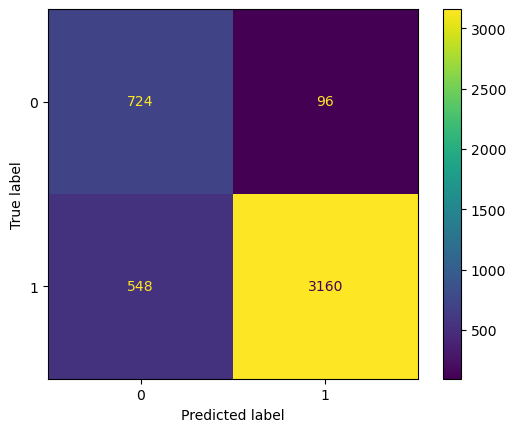

In [ ]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8735914958006779

 precision-0          score for tfidf : 0.6060444559722551

 recall-0             score for tfidf : 0.8649779449922159

 f1-0                 score for tfidf : 0.7126280998162151

 precision-1          score for tfidf : 0.9670190410869071

 recall-1             score for tfidf : 0.8754966088908667

 f1-1                 score for tfidf : 0.9189692117716838



model 1 AUC score: 0.9361772173546978


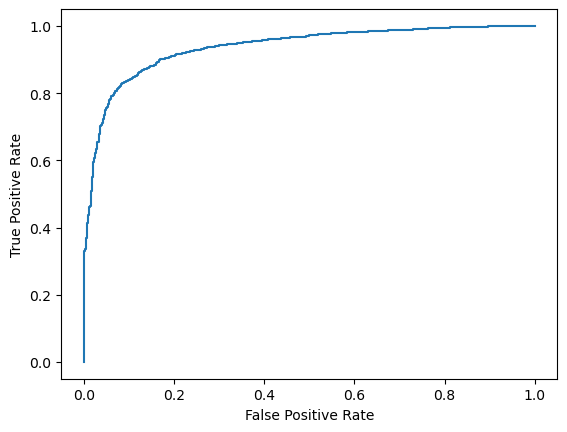

In [ ]:
log_prob = log.predict_proba(X_test_tf_idf)
log_prob = log_prob[:, 1]
plot_roc_curve(y_test, log_prob)
print(f'model 1 AUC score: {roc_auc_score(y_test, log_prob)}')

__Naive Bayes using count vectorisation__

In [ ]:
# Naive Bayes with count vectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       820
           1       0.95      0.92      0.93      3708

    accuracy                           0.89      4528
   macro avg       0.81      0.85      0.83      4528
weighted avg       0.90      0.89      0.89      4528

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      3281
           1       0.96      0.92      0.94     14827

    accuracy                           0.91     18108
   macro avg       0.83      0.88      0.85     18108
weighted avg       0.92      0.91      0.91     18108



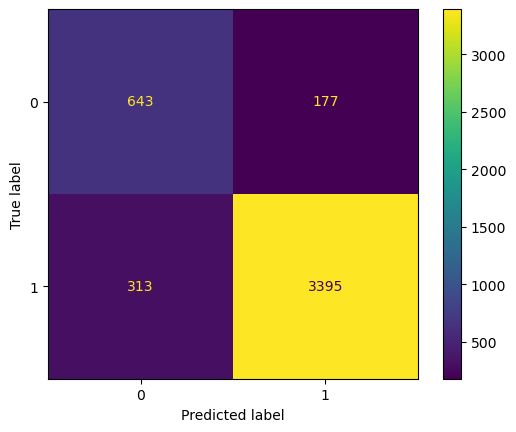

In [ ]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.890269317949547

 precision-0          score for count : 0.6664869052952277

 recall-0             score for count : 0.7903189635999703

 f1-0                 score for count : 0.7229729595259762

 precision-1          score for count : 0.9516281451028584

 recall-1             score for count : 0.9123893100664937

 f1-1                 score for count : 0.9315796719032898



model 2 AUC score: 0.9297760938774438


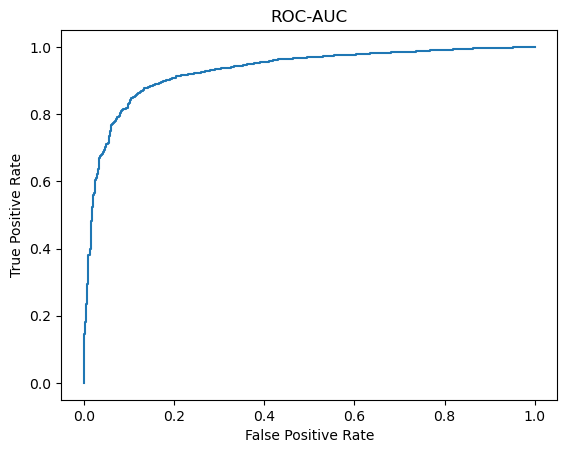

In [ ]:
nb_prob = nb.predict_proba(X_test_count)
nb_prob = nb_prob[:, 1]
plot_roc_curve(y_test, nb_prob)
plt.title('ROC-AUC')
print(f'model 2 AUC score: {roc_auc_score(y_test, nb_prob)}')

In [ ]:
# fine-tuning
params_grid = {"alpha": [0.1, 1.0, 10, 100]}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=101)

grid_search = GridSearchCV(estimator=nb, param_grid=params_grid, cv=cv_method, verbose=1, scoring='f1')

In [ ]:
grid_search.fit(X_train_count, y_train)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=101),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 10, 100]}, scoring='f1',
             verbose=1)

In [ ]:
print(grid_search.best_params_)

{'alpha': 1.0}


__Naive Bayes using tf-idf vectorisation__

In [ ]:
# Naive Bayes with tf-idf vectorizer
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.19      0.31       820
           1       0.85      0.99      0.91      3708

    accuracy                           0.85      4528
   macro avg       0.85      0.59      0.61      4528
weighted avg       0.85      0.85      0.80      4528

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.26      0.41      3281
           1       0.86      1.00      0.92     14827

    accuracy                           0.86     18108
   macro avg       0.90      0.63      0.66     18108
weighted avg       0.87      0.86      0.83     18108



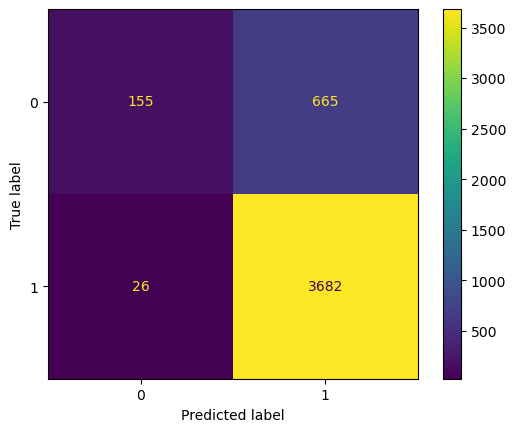

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8829249125204781

 precision-0          score for tfidf : 0.6541155397195321

 recall-0             score for tfidf : 0.7512936466750686

 f1-0                 score for tfidf : 0.699265914028718

 precision-1          score for tfidf : 0.943104509759424

 recall-1             score for tfidf : 0.912052201149692

 f1-1                 score for tfidf : 0.9273111880086397



model 2 AUC score: 0.9255403609861341


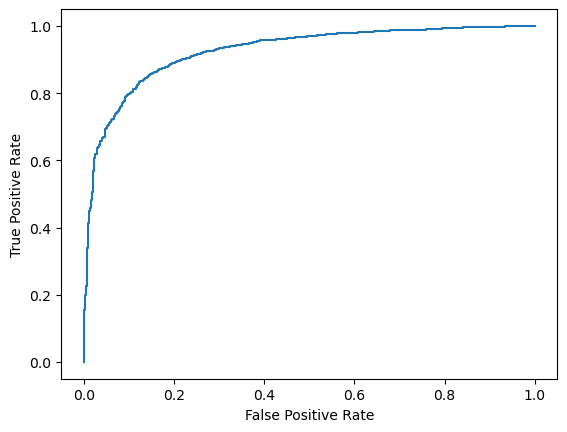

In [ ]:
nb_prob = nb.predict_proba(X_test_tf_idf)
nb_prob = nb_prob[:, 1]
plot_roc_curve(y_test, nb_prob)
print(f'model 2 AUC score: {roc_auc_score(y_test, nb_prob)}')

__SVM using count vectorisation__

In [ ]:
# SVM with count vectorizer
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.62      0.87      0.72       820
           1       0.97      0.88      0.92      3708

    accuracy                           0.88      4528
   macro avg       0.79      0.87      0.82      4528
weighted avg       0.90      0.88      0.89      4528

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      3281
           1       0.98      0.90      0.94     14827

    accuracy                           0.91     18108
   macro avg       0.83      0.92      0.87     18108
weighted avg       0.93      0.91      0.91     18108



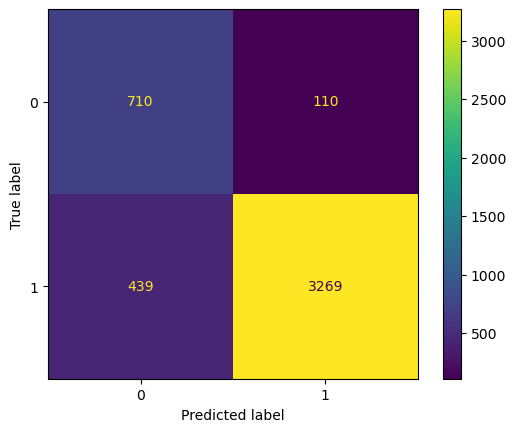

In [ ]:
print("SVC MODEL")

eval(svc, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8787829135028111

 precision-0          score for count : 0.6219511384357788

 recall-0             score for count : 0.8445613092149158

 f1-0                 score for count : 0.7162969193787602

 precision-1          score for count : 0.9626560834887025

 recall-1             score for count : 0.8863553471052494

 f1-1                 score for count : 0.9229223750542017



model 3 AUC score: 0.93466466703502


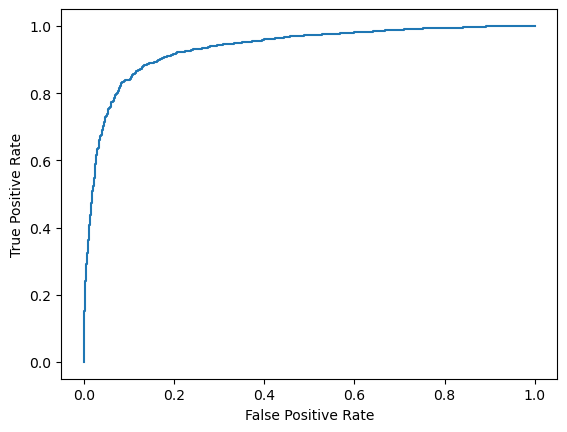

In [ ]:
svm_prob = svc._predict_proba_lr(X_test_count)
svm_prob = svm_prob[:, 1]
plot_roc_curve(y_test, svm_prob)
print(f'model 3 AUC score: {roc_auc_score(y_test, svm_prob)}')

__SVM using tf-idf vectorisation__

In [ ]:
# SVM with tf-idf vectorizer
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69       820
           1       0.97      0.85      0.91      3708

    accuracy                           0.86      4528
   macro avg       0.77      0.87      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.90      0.71      3281
           1       0.98      0.86      0.91     14827

    accuracy                           0.87     18108
   macro avg       0.78      0.88      0.81     18108
weighted avg       0.90      0.87      0.88     18108



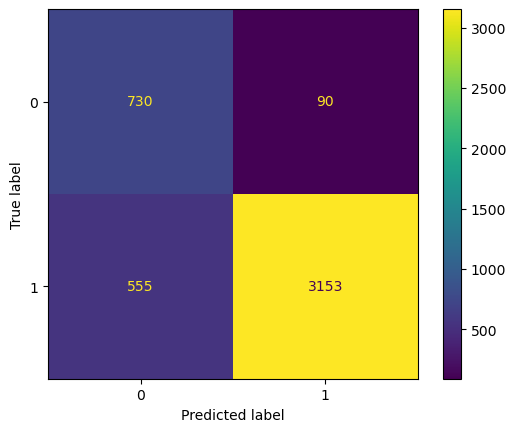

In [ ]:
print("SVC MODEL")

eval(svc, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8550912624202616

 precision-0          score for tfidf : 0.5650182782810276

 recall-0             score for tfidf : 0.8710745792868263

 f1-0                 score for tfidf : 0.6853608714076943

 precision-1          score for tfidf : 0.9676063017851438

 recall-1             score for tfidf : 0.8515535038124383

 f1-1                 score for tfidf : 0.9058630221994587



model 3 AUC score: 0.9362985765779988


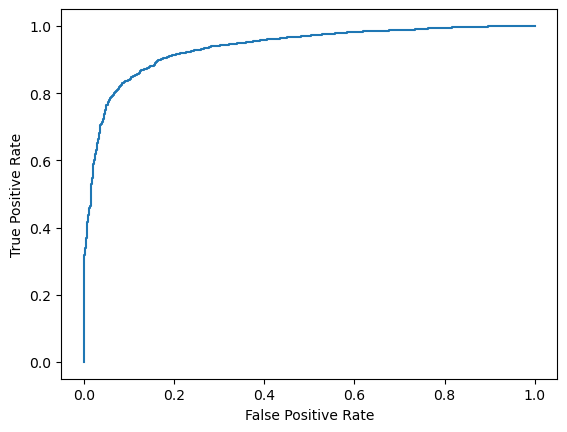

In [ ]:
svm_prob = svc._predict_proba_lr(X_test_tf_idf)
svm_prob = svm_prob[:, 1]
plot_roc_curve(y_test, svm_prob)
print(f'model 3 AUC score: {roc_auc_score(y_test, svm_prob)}')

__Random Forest using count vectorisation__

In [ ]:
# Random Forest with count vectorizer
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.81      0.67       820
           1       0.95      0.87      0.91      3708

    accuracy                           0.86      4528
   macro avg       0.76      0.84      0.79      4528
weighted avg       0.88      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      3281
           1       0.98      0.89      0.93     14827

    accuracy                           0.89     18108
   macro avg       0.81      0.89      0.84     18108
weighted avg       0.92      0.89      0.90     18108



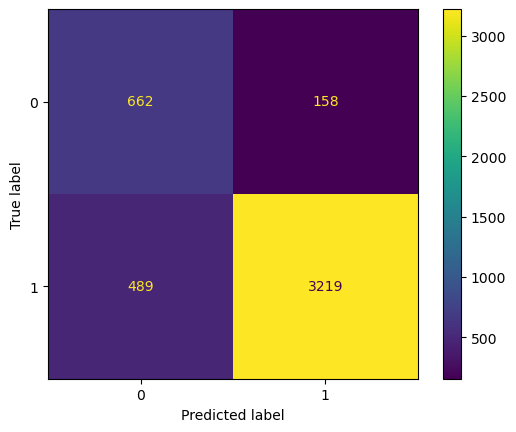

In [ ]:
print("RF MODEL")

eval(rf, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8557538187442608

 precision-0          score for count : 0.5736458811157

 recall-0             score for count : 0.794269404700126

 f1-0                 score for count : 0.6660874610036936

 precision-1          score for count : 0.9502659252036574

 recall-1             score for count : 0.8693593065083997

 f1-1                 score for count : 0.9080014042506497



model 2 AUC score: 0.9143383126792433


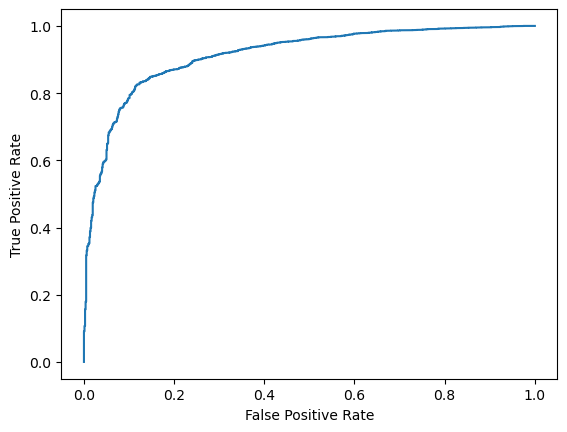

In [ ]:
rf_prob = rf.predict_proba(X_test_count)
rf_prob = rf_prob[:, 1]
plot_roc_curve(y_test, rf_prob)
print(f'model 2 AUC score: {roc_auc_score(y_test, rf_prob)}')

__Random Forest using tf-idf vectorisation__

In [ ]:
# Random Forest with tf-idf vectorizer
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.82      0.65       820
           1       0.96      0.85      0.90      3708

    accuracy                           0.84      4528
   macro avg       0.75      0.83      0.77      4528
weighted avg       0.88      0.84      0.85      4528

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.90      0.73      3281
           1       0.98      0.87      0.92     14827

    accuracy                           0.88     18108
   macro avg       0.79      0.89      0.82     18108
weighted avg       0.91      0.88      0.89     18108



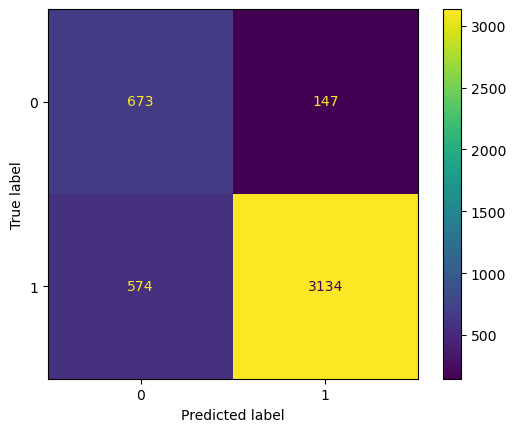

In [ ]:
print("RF MODEL")

eval(rf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8457585168598284

 precision-0          score for tfidf : 0.5502876819409938

 recall-0             score for tfidf : 0.8162104307213285

 f1-0                 score for tfidf : 0.6571901516294323

 precision-1          score for tfidf : 0.9545126828995134

 recall-1             score for tfidf : 0.8522972910256865

 f1-1                 score for tfidf : 0.9004788682664309



model 2 AUC score: 0.910155695003552


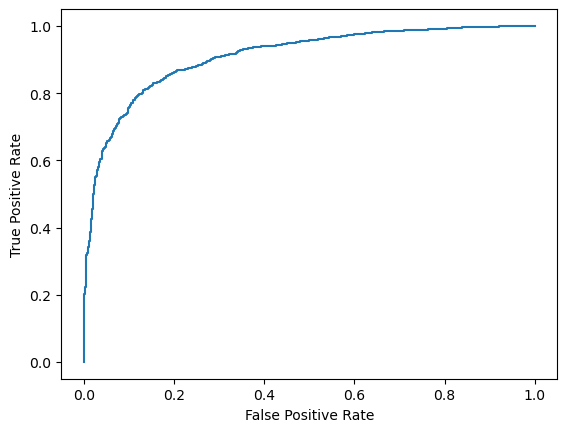

In [ ]:
rf_prob = rf.predict_proba(X_test_tf_idf)
rf_prob = rf_prob[:, 1]
plot_roc_curve(y_test, rf_prob)
print(f'model 2 AUC score: {roc_auc_score(y_test, rf_prob)}')

__Ada Boosting using count vectorisation__

In [ ]:
# Ada Boosting with count vectorizer
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       820
           1       0.92      0.95      0.93      3708

    accuracy                           0.89      4528
   macro avg       0.82      0.78      0.80      4528
weighted avg       0.88      0.89      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      3281
           1       0.94      0.97      0.95     14827

    accuracy                           0.92     18108
   macro avg       0.88      0.83      0.85     18108
weighted avg       0.91      0.92      0.92     18108



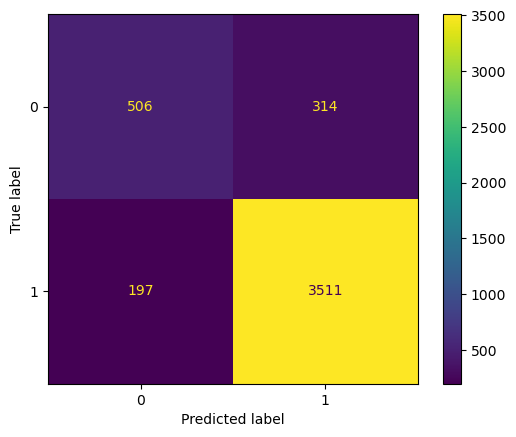

In [ ]:
print("Ada MODEL")

eval(ada, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8889442053015489

 precision-0          score for count : 0.731131081503757

 recall-0             score for count : 0.6126065683149232

 f1-0                 score for count : 0.6663962998552676

 precision-1          score for count : 0.9172654812495289

 recall-1             score for count : 0.9500916823413895

 f1-1                 score for count : 0.9333789790661852



model 5 AUC score: 0.9069893374904624


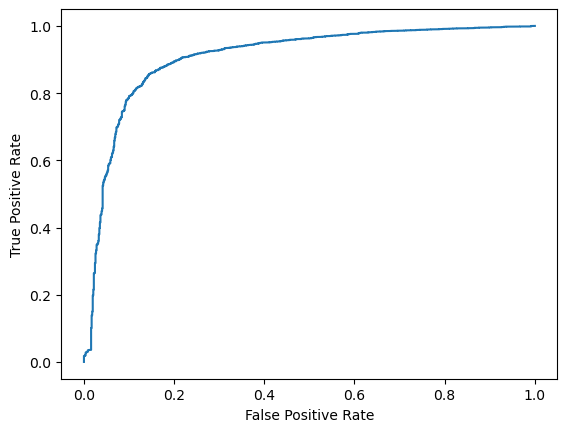

In [ ]:
ada_prob = ada.predict_proba(X_test_count)
ada_prob = ada_prob[:, 1]
plot_roc_curve(y_test, ada_prob)
print(f'model 5 AUC score: {roc_auc_score(y_test, ada_prob)}')

__Ada Boosting using tf-idf vectorisation__

In [ ]:
# Ada Boosting with tf-idf vectorizer
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.64      0.68       820
           1       0.92      0.94      0.93      3708

    accuracy                           0.89      4528
   macro avg       0.82      0.79      0.80      4528
weighted avg       0.88      0.89      0.89      4528

Train_Set
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      3281
           1       0.94      0.97      0.96     14827

    accuracy                           0.93     18108
   macro avg       0.89      0.86      0.87     18108
weighted avg       0.93      0.93      0.93     18108



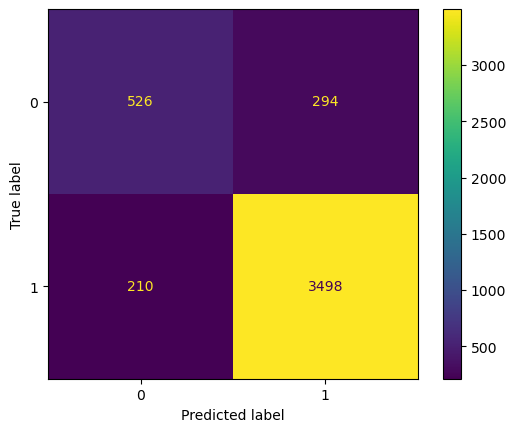

In [ ]:
print("Ada MODEL")

eval(ada, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8825934208077708

 precision-0          score for tfidf : 0.7027191812249736

 recall-0             score for tfidf : 0.6107949069612276

 f1-0                 score for tfidf : 0.6532660561741198

 precision-1          score for tfidf : 0.9163162310575268

 recall-1             score for tfidf : 0.9427397595602158

 f1-1                 score for tfidf : 0.9293262837860492



model 5 AUC score: 0.9098800878785487


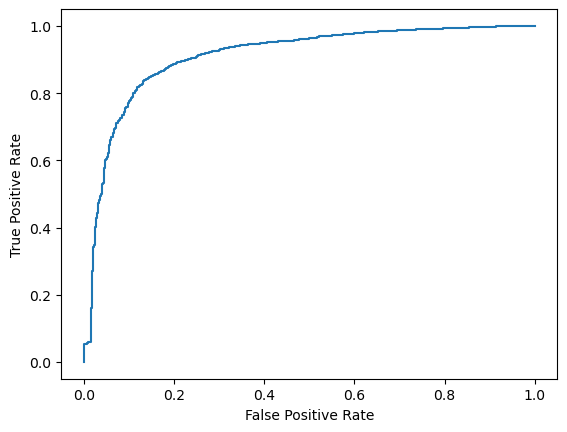

In [ ]:
ada_prob = ada.predict_proba(X_test_tf_idf)
ada_prob = ada_prob[:, 1]
plot_roc_curve(y_test, ada_prob)
print(f'model 5 AUC score: {roc_auc_score(y_test, ada_prob)}')

__Deep Learning__

In [ ]:
# Deep Learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df_text

,Combined,Rating,Recommended IND,Polarity
0,absolutely wonderful silky sexy comfortable,4,1,0.633333
1,love dress sooo pretty happen find store im gl...,5,1,0.339583
2,major design flaws high hope dress really want...,3,0,0.073209
3,favorite buy love love love jumpsuit fun flirt...,5,1,0.560714
4,flatter shirt shirt flatter due adjustable fro...,5,1,0.512891
...,...,...,...,...
22631,great dress many occasion happy snag dress gre...,5,1,0.580476
22632,wish make cotton remind maternity clothes soft...,3,1,0.091667
22633,cute see fit well top see never would work im ...,3,0,0.425000
22634,cute dress perfect summer party buy dress wed ...,3,1,0.413636


In [ ]:
# 'stratify' for the imbalanced dataset
X = df_text['Combined'].values
y = df_text['Recommended IND'].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
# tokenisation
tokenizer.fit_on_texts(X)

In [ ]:
tokenizer.word_index

{'dress': 1,
 'love': 2,
 'fit': 3,
 'size': 4,
 'look': 5,
 'top': 6,
 'wear': 7,
 'great': 8,
 'like': 9,
 'color': 10,
 'im': 11,
 'small': 12,
 'fabric': 13,
 'would': 14,
 'get': 15,
 'order': 16,
 'cute': 17,
 'perfect': 18,
 'beautiful': 19,
 'make': 20,
 'go': 21,
 'well': 22,
 'really': 23,
 'little': 24,
 'buy': 25,
 'soft': 26,
 'one': 27,
 'large': 28,
 'nice': 29,
 'run': 30,
 'comfortable': 31,
 'flatter': 32,
 'back': 33,
 'try': 34,
 'sweater': 35,
 'shirt': 36,
 'think': 37,
 'work': 38,
 'short': 39,
 'pretty': 40,
 'material': 41,
 'much': 42,
 'jean': 43,
 'long': 44,
 'bit': 45,
 'length': 46,
 'good': 47,
 'also': 48,
 'quality': 49,
 'petite': 50,
 'skirt': 51,
 'big': 52,
 'pant': 53,
 'waist': 54,
 'even': 55,
 'purchase': 56,
 'medium': 57,
 'feel': 58,
 'retailer': 59,
 'want': 60,
 'style': 61,
 'way': 62,
 'store': 63,
 'super': 64,
 'usually': 65,
 'find': 66,
 'cut': 67,
 'could': 68,
 'summer': 69,
 'see': 70,
 'design': 71,
 'dont': 72,
 'didnt': 73,
 '

In [ ]:
len(tokenizer.word_index)

5532

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.array(X_num_tokens)

array([list([165, 351, 717, 432, 31]),
       list([2, 1, 1182, 40, 645, 66, 63, 11, 225, 706, 301, 14, 16, 82, 706, 50, 25, 50, 2, 46, 158, 24, 214, 14, 106, 79, 1009, 312, 578, 50]),
       list([1390, 71, 2075, 108, 386, 1, 23, 797, 38, 920, 16, 50, 12, 163, 4, 66, 12, 12, 506, 68, 453, 1099, 50, 57, 423, 168, 6, 519, 31, 3, 179, 104, 519, 87, 187, 394, 559, 330, 2076, 187, 1436, 1390, 71, 648, 2076, 187, 839, 2617, 303, 747]),
       ...,
       list([17, 70, 3, 22, 6, 70, 301, 14, 38, 11, 225, 308, 34, 63, 73, 16, 82, 157, 13, 14, 8]),
       list([17, 1, 18, 69, 549, 25, 1, 574, 69, 17, 221, 3, 263, 18, 57, 3, 54, 96, 62, 44, 52, 137, 102, 60, 1020, 684, 68, 15, 504, 185, 9, 186, 203, 112, 495, 1, 1947, 570, 66, 42, 330, 5]),
       list([415, 20, 9, 27, 1, 86, 234, 3, 96, 160, 7, 111, 309, 136])],
      dtype=object)

In [ ]:
max_tokens = 65
sum(num_tokens < max_tokens) / len(num_tokens)

1.0

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.006)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 65, 100)          1000000   
                                                                 
 gru (GRU)                   (None, 65, 48)            21600     
                                                                 
 gru_1 (GRU)                 (None, 65, 24)            5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

1    0.818809
0    0.181191
dtype: float64

In [ ]:
weights = {0:82, 1:18}

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=weights,
          validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
71/71 [==============================] - 25s 251ms/step - loss: 12.9628 - recall: 0.7995 - val_loss: 0.4154 - val_recall: 0.8101
Epoch 2/30
71/71 [==============================] - 16s 220ms/step - loss: 7.5715 - recall: 0.8844 - val_loss: 0.2824 - val_recall: 0.8959
Epoch 3/30
71/71 [==============================] - 14s 197ms/step - loss: 5.2431 - recall: 0.9190 - val_loss: 0.3235 - val_recall: 0.8784
Epoch 4/30
71/71 [==============================] - 15s 205ms/step - loss: 3.9683 - recall: 0.9416 - val_loss: 0.3339 - val_recall: 0.8873
Epoch 5/30
71/71 [==============================] - 14s 204ms/step - loss: 3.2743 - recall: 0.9516 - val_loss: 0.3173 - val_recall: 0.9177
Epoch 6/30
71/71 [==============================] - 15s 215ms/step - loss: 2.7000 - recall: 0.9612 - val_loss: 0.4490 - val_recall: 0.8781
Epoch 7/30
71/71 [==============================] - 17s 238ms/step - loss: 2.0096 - recall: 0.9709 - val_loss: 0.4154 - val_recall: 0.9218
Epoch 8/30
71/71 [========

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,12.962790,0.799487,0.415386,0.810140
1,7.571485,0.884400,0.282359,0.895901
2,5.243145,0.918999,0.323492,0.878371
3,3.968348,0.941593,0.333911,0.887271
4,3.274293,0.951575,0.317252,0.917745


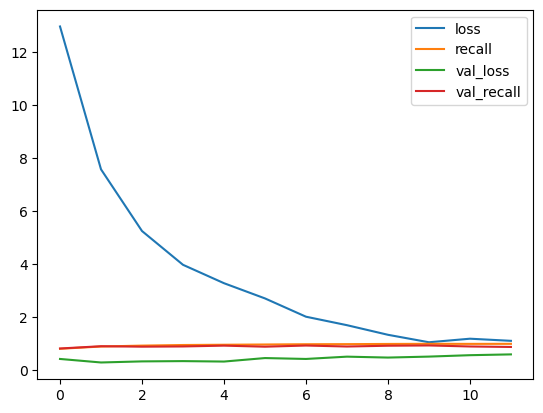

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 10s 17ms/step - loss: 0.1806 - recall: 0.9252


[0.18061095476150513, 0.9252040386199951]

In [ ]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 2s 17ms/step - loss: 0.2824 - recall: 0.8959


[0.2823587954044342, 0.8959007263183594]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 11s 18ms/step
[[ 3178   103]
 [ 1109 13718]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      3281
           1       0.99      0.93      0.96     14827

    accuracy                           0.93     18108
   macro avg       0.87      0.95      0.90     18108
weighted avg       0.95      0.93      0.94     18108



In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 3s 19ms/step
[[ 698  122]
 [ 386 3322]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       820
           1       0.96      0.90      0.93      3708

    accuracy                           0.89      4528
   macro avg       0.80      0.87      0.83      4528
weighted avg       0.91      0.89      0.89      4528



142/142 [==============================] - 3s 20ms/step
model 5 AUC score: 0.9321501631278449


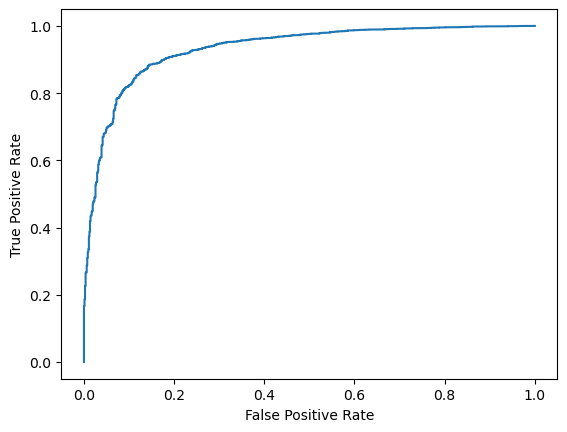

In [ ]:
dl_prob = model.predict(X_test)
plot_roc_curve(y_test, dl_prob)
print(f'model 5 AUC score: {roc_auc_score(y_test, dl_prob)}')

__Selecting models__

In [ ]:
compare = pd.DataFrame({"Accuracy": [0.8820413312140968, 0.8735914958006779, 0.890269317949547, 0.8829249125204781,
                                    0.8787829135028111, 0.8550912624202616, 0.8557538187442608, 0.8457585168598284,
                                    0.8889442053015489, 0.8825934208077708, 0.88],
                        "F1_Score_0": [0.7138283413881348, 0.7126280998162151, 0.7229729595259762, 0.699265914028718,
                                      0.7162969193787602, 0.6853608714076943, 0.6660874610036936, 0.6571901516294323,
                                      0.6663962998552676, 0.6532660561741198, 0.72],
                        "F1_Score_1": [0.9257059744715521, 0.9189692117716838, 0.9315796719032898, 0.9273111880086397,
                                      0.9229223750542017, 0.9058630221994587, 0.9080014042506497, 0.9004788682664309,
                                      0.9333789790661852, 0.9293262837860492, 0.92],
                        "AUC_Score": [0.9287897624121872, 0.9361772173546978, 0.9297760938774438, 0.9255403609861341,
                                     0.93466466703502, 0.9362985765779988, 0.9143383126792433, 0.910155695003552,
                                     0.9069893374904624, 0.9098800878785487, 0.9321501631278449]},
                      index = ["LogisticRegression_count", "LogisticRegression_tfidf", "NaiveBayes_count", "NaiveBayes_tfidf",
                                  "SVM_count", "SVM_tfidf", "RandomForest_count", "RandomForest_tfidf",
                                  "AdaBoost_count", "AdaBoost_tfidf", "RNN"],)

In [ ]:
compare

,Accuracy,F1_Score_0,F1_Score_1,AUC_Score
LogisticRegression_count,0.882041,0.713828,0.925706,0.928790
LogisticRegression_tfidf,0.873591,0.712628,0.918969,0.936177
NaiveBayes_count,0.890269,0.722973,0.931580,0.929776
NaiveBayes_tfidf,0.882925,0.699266,0.927311,0.925540
SVM_count,0.878783,0.716297,0.922922,0.934665
SVM_tfidf,0.855091,0.685361,0.905863,0.936299
RandomForest_count,0.855754,0.666087,0.908001,0.914338
RandomForest_tfidf,0.845759,0.657190,0.900479,0.910156
AdaBoost_count,0.888944,0.666396,0.933379,0.906989
AdaBoost_tfidf,0.882593,0.653266,0.929326,0.909880


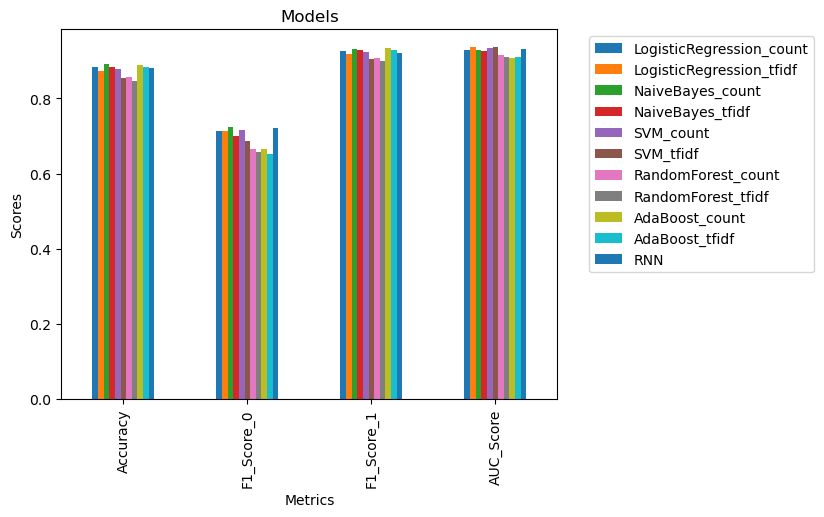

In [ ]:
compare.plot(kind="bar")
plt.title("Models")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Text(0.5, 0, 'Scores')

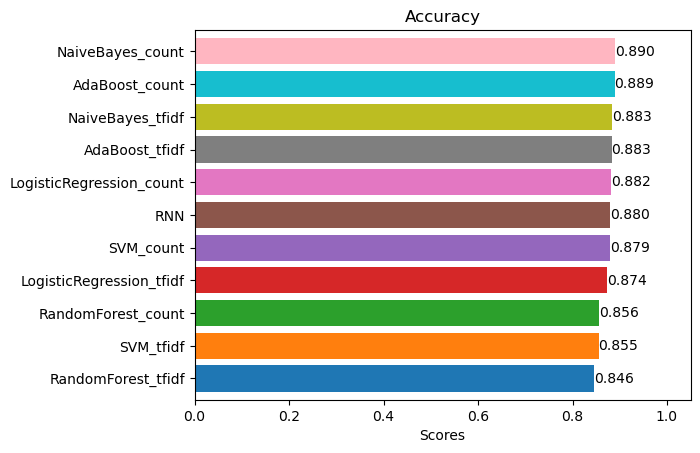

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lightpink']
compare = compare.sort_values(by="Accuracy")
ax = compare.plot.barh(y='Accuracy', legend=False, width=0.8, color=colors)
plt.xlim([0, 1.05])

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, '{:1.3f}'.format(width),
                ha = 'left', va = 'center')
labels(ax)

plt.title("Accuracy")
plt.xlabel("Scores")

Text(0.5, 0, 'Scores')

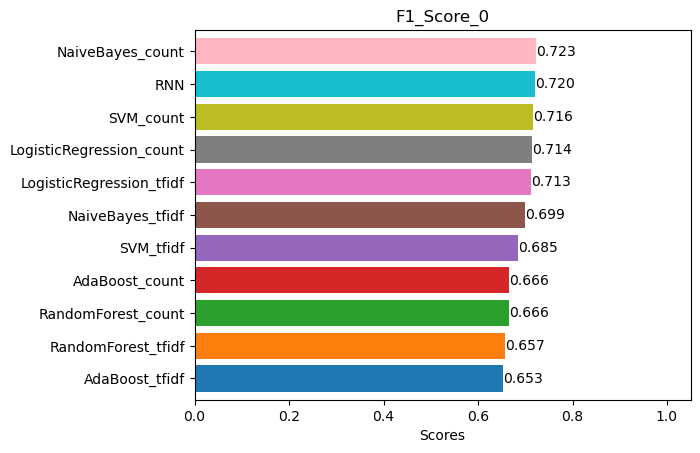

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lightpink']
compare = compare.sort_values(by="F1_Score_0")
ax = compare.plot.barh(y='F1_Score_0', legend=False, width=0.8, color=colors)
plt.xlim([0, 1.05])

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, '{:1.3f}'.format(width),
                ha = 'left', va = 'center')
labels(ax)

plt.title("F1_Score_0")
plt.xlabel("Scores")

Text(0.5, 0, 'Scores')

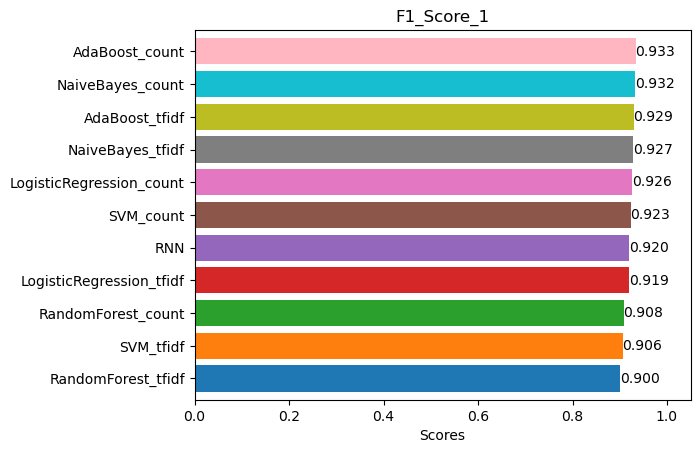

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lightpink']
compare = compare.sort_values(by="F1_Score_1")
ax = compare.plot.barh(y='F1_Score_1', legend=False, width=0.8, color=colors)
plt.xlim([0, 1.05])

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, '{:1.3f}'.format(width),
                ha = 'left', va = 'center')
labels(ax)
plt.title("F1_Score_1")
plt.xlabel("Scores")

Text(0.5, 0, 'Scores')

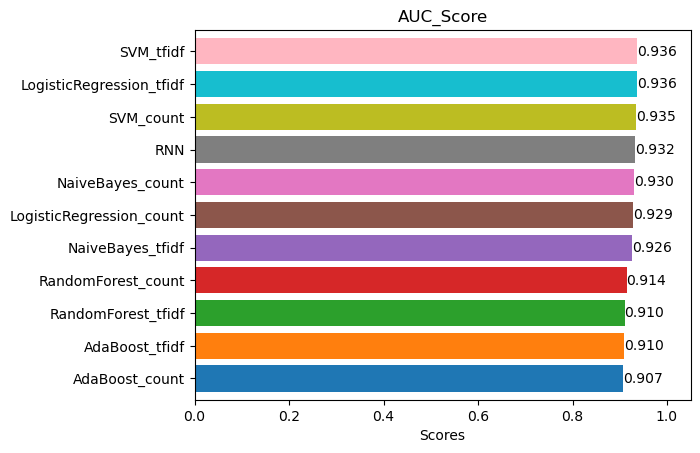

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lightpink']
compare = compare.sort_values(by="AUC_Score")
ax = compare.plot.barh(y='AUC_Score', legend=False, width=0.8, color=colors)
plt.xlim([0, 1.05])

def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, '{:1.3f}'.format(width),
                ha = 'left', va = 'center')
labels(ax)
plt.title("AUC_Score")
plt.xlabel("Scores")